**EMİR HAKTAN ÜNAL**

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


# Daire Tespiti

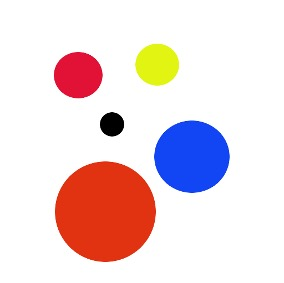

In [ ]:
img = cv2.imread("/content/resim4.jpg")
imgGRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlurred = cv2.blur(imgGRAY,(1,1))
cv2_imshow(img)


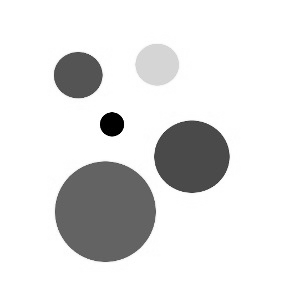

In [ ]:
Mean_filtre= cv2.GaussianBlur(imgGRAY,(1,1), sigmaX=5)
cv2_imshow(Mean_filtre)

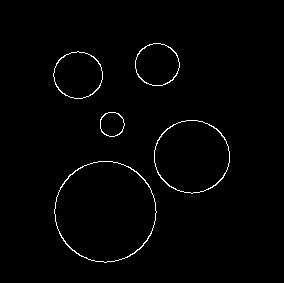

In [ ]:
imgCanny = cv2.Canny(imgBlurred,100,100)
cv2_imshow(imgCanny)

In [ ]:
circles = cv2.HoughCircles(imgBlurred, cv2.HOUGH_GRADIENT, 1, 20,
                            minRadius=2, maxRadius=130,
                            param1=50, param2=30)
cv2_imshow(circles)

[[[104.5 211.5  49.9]
  [192.5 156.5  36.4]
  [ 77.5  74.5  23.3]
  [155.5  64.5  20.8]
  [111.5 123.5  12.4]]]


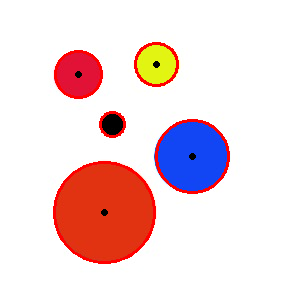

In [ ]:
print(circles)

circles = np.uint16(np.around(circles)) 

k=0
for circle in circles:
    for x,y,r in circle:
        cv2.circle(img, (x,y), r, [0,0,255], 2)
        cv2.circle(img, (x,y), 2, [0,0,0], 2)
        k=k+1

cv2_imshow(img)

cv2.waitKey()
cv2.destroyAllWindows()

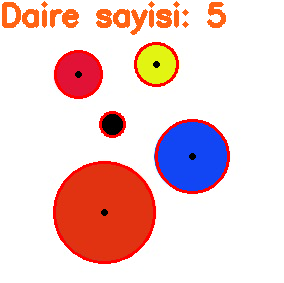

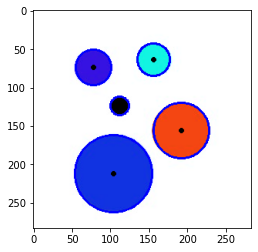

In [ ]:
plt.imshow(img)
string = f"Daire sayisi: {k}"
loc = (0,25) 
scale = 1
thickness=4
color = [20,100,255]
cv2.putText(img,string,loc,cv2.FONT_ITALIC,scale,color,thickness)

cv2_imshow(img)


# KÖŞEBULMA

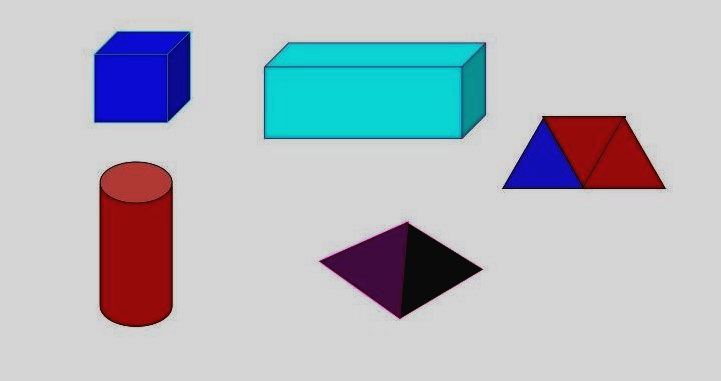

In [ ]:
Renkli=BGRresim = cv2.imread("/content/resimmm.jpg")
out=cv2.addWeighted( Renkli, 2.1, Renkli, -1.2,1.8)
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable[0,i] = np.clip(pow(i / 255.0, 1.813) * 255.0, 10, 255)
  Renkli = cv2.LUT(out,lookUpTable)

alpha = 1000
beta = 10000
res = cv2.multiply(Renkli, alpha)
res = cv2.add(res, beta)
res = cv2.convertScaleAbs(Renkli, alpha = alpha, beta = beta)
cv2_imshow(Renkli)






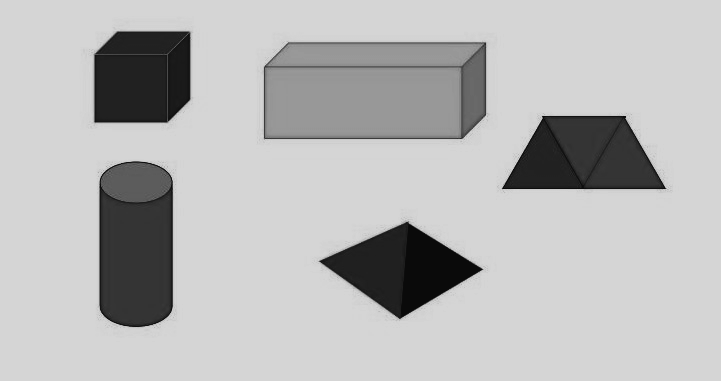

In [ ]:
Gri = cv2.cvtColor(Renkli,cv2.COLOR_BGR2GRAY)
cv2_imshow(Gri)

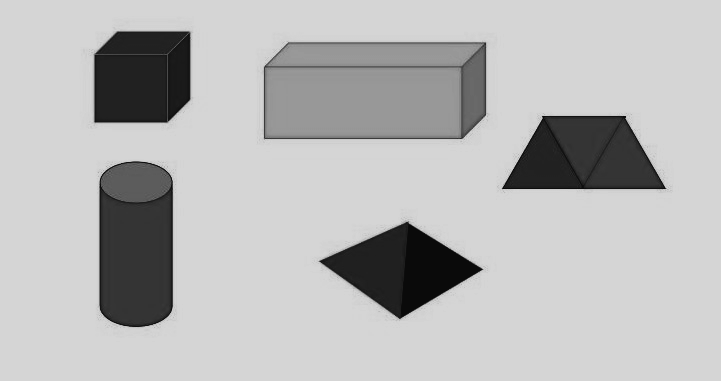

In [ ]:
GriFloat=np.float32(Gri)
cv2_imshow(GriFloat)


In [ ]:
tahmini_kose = 25
tarama_mesafesi = 1
hassasiyet = 0.0001
corners = cv2.goodFeaturesToTrack(GriFloat,tahmini_kose,hassasiyet,tarama_mesafesi)
print(type(corners))

<class 'numpy.ndarray'>


In [ ]:
corners = np.int0(corners)

In [ ]:
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(Renkli,(x,y),4,[0,0,255],3) 

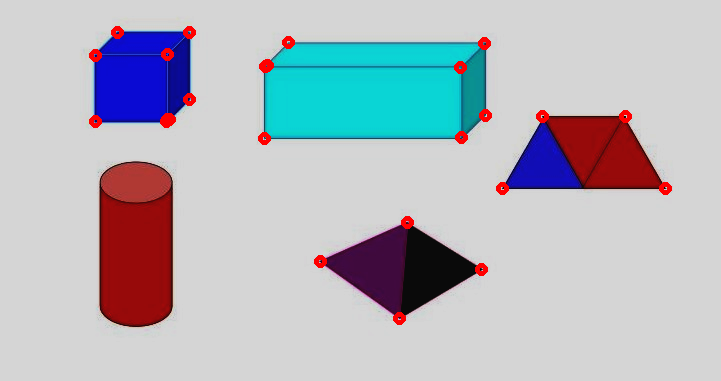

In [ ]:
cv2_imshow(Renkli)
